> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Missing Appointment Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this project, I am goin to be analyzing no show appointment data, emphasis will be given to finding out the factors that are important in predicting if a patient will show up for the appointment or not, The project will try answering the following questions. Is recieving sms associated with showing up for appointment? How does scholarship affect the rate of show up? On which days do patients show up most for their appointments? What is the relation between Age, gender and missing appointment? Lastly, Do patients with specific illness show more than others? In the analysis I will try to these questions and hopefully more. 

In [1]:
# Importing packages I plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, the data will be loaded, check for cleanliness, and then trimmed and cleaned it for analysis. The cleaning stpes will be documented and cleaning decisions will be justified. your cleaning decisions.

### General Properties

In [2]:
# Loading the data and inspecting its types and looking for instances of missing or possibly errant data.
data = pd.read_csv('noshow.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [3]:
# Overvieing the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In the above info, we have a total of 14 columns with no missing or null values in all columns, but the data types are not quite alright, we need to change AppointmentDay and ScheduledDay into a datetime function because the are both dates. We also need to Check for Duplicate rows using the code below.
### Duplicates

In [4]:
data.duplicated().sum()

0

It is quite clear that no duplicates found in the dataframe, we are therefore good to go for other cleaning.
Based on the questions we are trying answer, the following variables will not be useful: AppointmentID, PatientId, Neighbourhood and ScheduledDay So, we are going to get rid of the columns. Also, to get the exact days of the we need additional variable.
### Checking for Outliers 
The only Quantitative variable in the dataframe is Age, therefore, it is the only variable that may have have outliers in this case, hence we are going to be checking only Age for outliers Using Inter Quatile Range (IQR) Score.

In [5]:
# Before going for the IQR lets see the description of the Ages
data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Looking at the description of the age variable, it is easy to detect outliers which may result from incorrect data. The minimum and maximum ages are -1, and 115 respectively. The maximum may be possible but the minimum is definitely incorrect because age cannot be negative.
Lets have a visual look at the outliers.

### Finding and Cleaning Outliers
To clean the outliers we are going to use Flooring and Capping to find the outliers and we will replace the them with the median, this is because the mean is affected by the outliers while the median is not.

In [25]:
# Finding median 

med = data['Age'].median()

#The floor age will be 0 and the cap 100, all the outliers will be replaced with the median
data.loc[data.Age > 100, "Age"] = med
data.loc[data.Age < 0, "Age"] = med
# Lets look at the description again
data.loc[data.Age < 0, "Age"] = med

data.Age.describe()

count    110527.000000
mean         37.084513
std          23.102329
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

 In the cell above, all ages less than 18 or greater than 100 years are replaced with the median

In [7]:
df_clean = data.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'Neighbourhood'], axis =1)
df_clean = df_clean.rename(columns = {'No-show': 'No_show'})
df_clean['AppointmentDay']= pd.to_datetime(df_clean['AppointmentDay'])
df_clean['AppDay'] = df_clean['AppointmentDay'].dt.dayofweek
df_clean.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AppDay
0,F,2016-04-29 00:00:00+00:00,62.0,0,1,0,0,0,0,No,4
1,M,2016-04-29 00:00:00+00:00,56.0,0,0,0,0,0,0,No,4
2,F,2016-04-29 00:00:00+00:00,62.0,0,0,0,0,0,0,No,4
3,F,2016-04-29 00:00:00+00:00,8.0,0,0,0,0,0,0,No,4
4,F,2016-04-29 00:00:00+00:00,56.0,0,1,1,0,0,0,No,4


#### Now, To make it easy we are going to create masks for the rows where patients  showed up and those that do not
The masks are:

show = patients that showed for their appointments

no_show = patients that do not show for their appointment

In [8]:
# defining the show and no_show masks
show = df_clean.No_show == 'No'
no_show = df_clean.No_show == 'Yes'

# Lets take a look
df_clean[show].head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AppDay
0,F,2016-04-29 00:00:00+00:00,62.0,0,1,0,0,0,0,No,4
1,M,2016-04-29 00:00:00+00:00,56.0,0,0,0,0,0,0,No,4
2,F,2016-04-29 00:00:00+00:00,62.0,0,0,0,0,0,0,No,4
3,F,2016-04-29 00:00:00+00:00,8.0,0,0,0,0,0,0,No,4
4,F,2016-04-29 00:00:00+00:00,56.0,0,1,1,0,0,0,No,4


In [9]:
df_clean[no_show].head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AppDay
6,F,2016-04-29 00:00:00+00:00,23.0,0,0,0,0,0,0,Yes,4
7,F,2016-04-29 00:00:00+00:00,39.0,0,0,0,0,0,0,Yes,4
11,M,2016-04-29 00:00:00+00:00,29.0,0,0,0,0,0,1,Yes,4
17,F,2016-04-29 00:00:00+00:00,40.0,1,0,0,0,0,0,Yes,4
20,F,2016-04-29 00:00:00+00:00,30.0,0,0,0,0,0,0,Yes,4


In the show dataframe, all the values in the No_show column are 'NO', while in the no_show dataframe all the values are Yes, therefore, show contains all the rows that showed for the appointment and no_show contains all the rows that did not show for the appointment.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that we've cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### Research Question 1: Is recieving sms associated with showing up for the appointment?

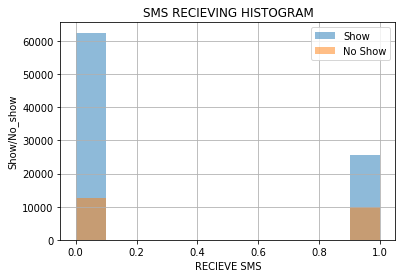

In [10]:
# exploring the relationship between recieving sms and showing up

plt.xlabel('RECIEVE SMS')
plt.ylabel('Show/No_show')
plt.title('SMS RECIEVING HISTOGRAM')
df_clean.SMS_received[show].hist(alpha = 0.5, label = 'Show')
df_clean.SMS_received[no_show].hist(alpha = 0.5, label = 'No Show')

plt.legend();

In the above histogram, It appears that most of those that show up for the appointment did not recieve sms and they are significantly higher than those that recieved sms and showed for the appointment. In turn, those that did not recieve sms and did not show up are a little bit higher than those that recieved SMS and did not show up.Therefore, I would say; recieving sms is not an imfortant factor in predicting those that will show up for their appointment. Hence it has no relationship with showing up for the appointment.

### Research Question 2 : How Does scholarship affect the rate of show up?

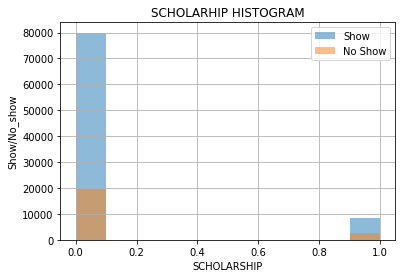

In [11]:
# exploring scholarship effect
plt.xlabel('SCHOLARSHIP')
plt.ylabel('Show/No_show')
plt.title('SCHOLARHIP HISTOGRAM')
df_clean.Scholarship[show].hist(alpha = 0.5, label = 'Show')
df_clean.Scholarship[no_show].hist(alpha = 0.5, label = 'No Show')
plt.legend();

In [12]:
df_clean.Scholarship[show].value_counts(normalize = True)

0    0.906097
1    0.093903
Name: Scholarship, dtype: float64

In [13]:
df_clean.Scholarship[no_show].value_counts(normalize = True)

0    0.884493
1    0.115507
Name: Scholarship, dtype: float64

Going by the above, most of the patients that showed for the appoitment are those without scholarship which is significantly higher than those with scholarship. but for the scholarship being limited, ration should be taken to understand if the scholarship attracts more show up. around 76% of those with scholarship show up for their appointment, while 72% of those without scholarship show up for their appointments. this shows that there exist some postive relatioinship between scholarship and showing up for appointments, and this makes scholarship an important factor in predicting show up.

### Research Question 3: On which days patients show up most for their appointments?

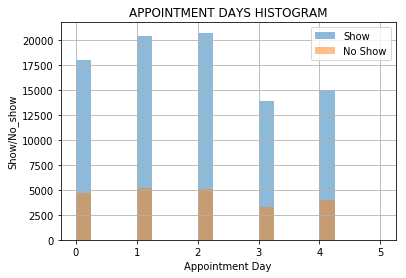

In [29]:
plt.xlabel('Appointment Day')
plt.ylabel('Show/No_show')
plt.title('APPOINTMENT DAYS HISTOGRAM')
df_clean.AppDay[show].hist(alpha = 0.5, bins = 20, label = 'Show')
df_clean.AppDay[no_show].hist(alpha = 0.5, bins = 20, label = 'No Show')
plt.legend();

It appears that, Wednesday (2) is the day that most of the patients show for their appointments, followed by Tuesday(2) and Monday (1), Thursday and Friday are the days with the worst show up. Regarding the number of No_show, Thursday is the least, followed by Friday, with others days showing more number of missed appointments. Therefore, It can be said that the most of the patients show up most on Wednesday.
### Research Question 3: What is the relation between Age, gender and missing appointment
To find that we will group both genders on their show using a bar chart, in order to see the Genders that show up most.

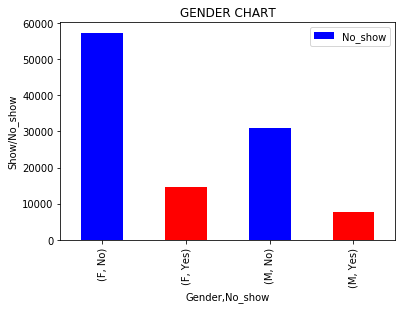

In [37]:
plt.xlabel('AGE AND GENDER')
plt.ylabel('Show/No_show')
plt.title('GENDER CHART')
df_clean.groupby('Gender')['No_show'].value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.legend();

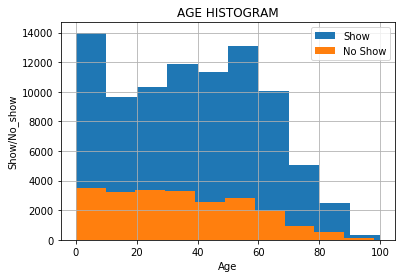

In [32]:
plt.xlabel('Age')
plt.ylabel('Show/No_show')
plt.title('AGE HISTOGRAM')
df_clean.Age[show].hist(label = 'Show')
df_clean.Age[no_show].hist(label = 'No Show')
plt.legend()

Regarding the gender, the Females show up most for the appointment, and the ration to which males missed appointment is higher than that of the females. In short we can say that, the females are much more functual in showing up for appointments.
The age distribution showed that, children between 0 - 10 years show up for the appointments more than all other age groups, followed by those between 55 and 60, while the elderly comes last.

### Do patients with specific illness show more than others?
To answer this question we need to find out the number of patients with specific illness and compare their rate of showing for appointments, to do this we will create four instances for each condition as below.

In [17]:
# the instances for each medical condition is drived in these variables
Hiper = df_clean.loc[df_clean['Hipertension'] == 1]
Dia = df_clean.loc[df_clean['Diabetes'] == 1]
Alco = df_clean.loc[df_clean['Alcoholism'] == 1]
Hand = df_clean.loc[df_clean['Handcap'] == 1]

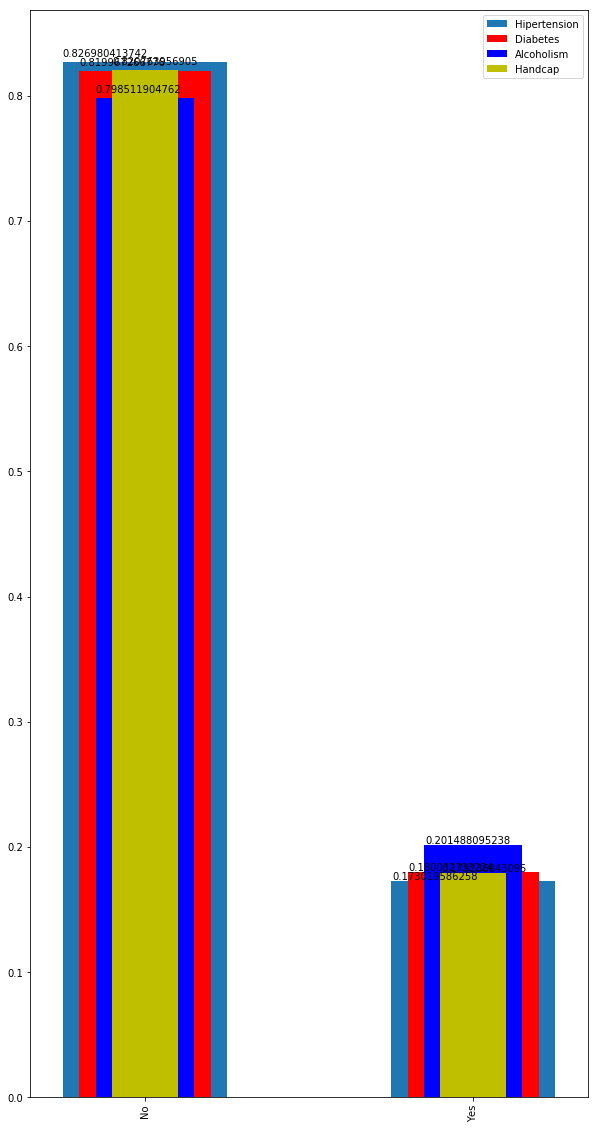

In [34]:
# To find out the patients with medical conditions that show up most, we will calculate the show up percentage for each condition

fig , ax = plt.subplots(figsize = (10,20))

Hiper.No_show.value_counts(normalize = True).plot(kind = 'bar', ax = ax, label = 'Hipertension')
Dia.No_show.value_counts(normalize = True).plot(kind='bar', width=0.4, color='r', ax=ax, label = 'Diabetes')
Alco.No_show.value_counts(normalize = True).plot(kind='bar', width=0.3, color='b', ax=ax, label = 'Alcoholism')
Hand.No_show.value_counts(normalize = True).plot(kind='bar', width=0.2, color='y', ax=ax, label = 'Handcap')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.legend()
plt.show()

As represented by the above figure, around 82% of the patient with Hipertension don't miss their appointments, As for Diabetes and Alcoholism, around 81% of the patients don't have missed appointments while 79% of Handcapped patients show up for their appointments. Therefore, it can be said that patients with Hipertension maybe more likely to show up for their appointments than others.

<a id='conclusions'></a>
## Conclusions

Based on the analysis presented, it maybe concluded that, looking at the percentage of patients with scholarship, they appear to be showing up for appointments more than those without. It also appears that patients show up mostly on Wednesday. Also, Young and medium aged people may show up for their appointments more than elderly. patients with Hipertension appear to showup more than those with other medical conditions. The project may come up with short comings such as the presentation and plots, and that maybe as a result of my little experiance in the working with analysis.
###  Limitations
#### Number of appointments in a day was not considered 
In the analysis of appointment days, number of appointments per each is not considered in the analysis, and that may be a problem which may result in wrong analysis as the number of appointments differ by days.
#### The ratio of Male to Female population is also not considered
In the gender chart, we based the analysis on the rate of show of males and females, and this may cause wrong analysis because the number of females may exceed the number of males and vice verca.

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0